In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set (color_codes=True)

# DATASET OVERVIEW:
# Source: Kaggle
# Dataset Size
# Total no. of attributes: 16
# No .of instances: 284

In [ ]:
#Loading the dataset
df=pd.read_csv("survey lung cancer.csv")

In [3]:
#display the headers
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
#checking the types of data
df.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

# DATA CLEANING

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [8]:
df.isnull().sum() #No missing values in this dataset

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [9]:
# First, we will change the data types of the categorical variables 
df['LUNG_CANCER'] = df['LUNG_CANCER'].factorize(['NO','YES'])[0]
df['GENDER'] = df['GENDER'].factorize(['NO','YES'])[0]

In [10]:
df.head() 
#Male = 1 Female = 0
#Yes = 1 No = 0

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


# HEAT MAP

<AxesSubplot:>

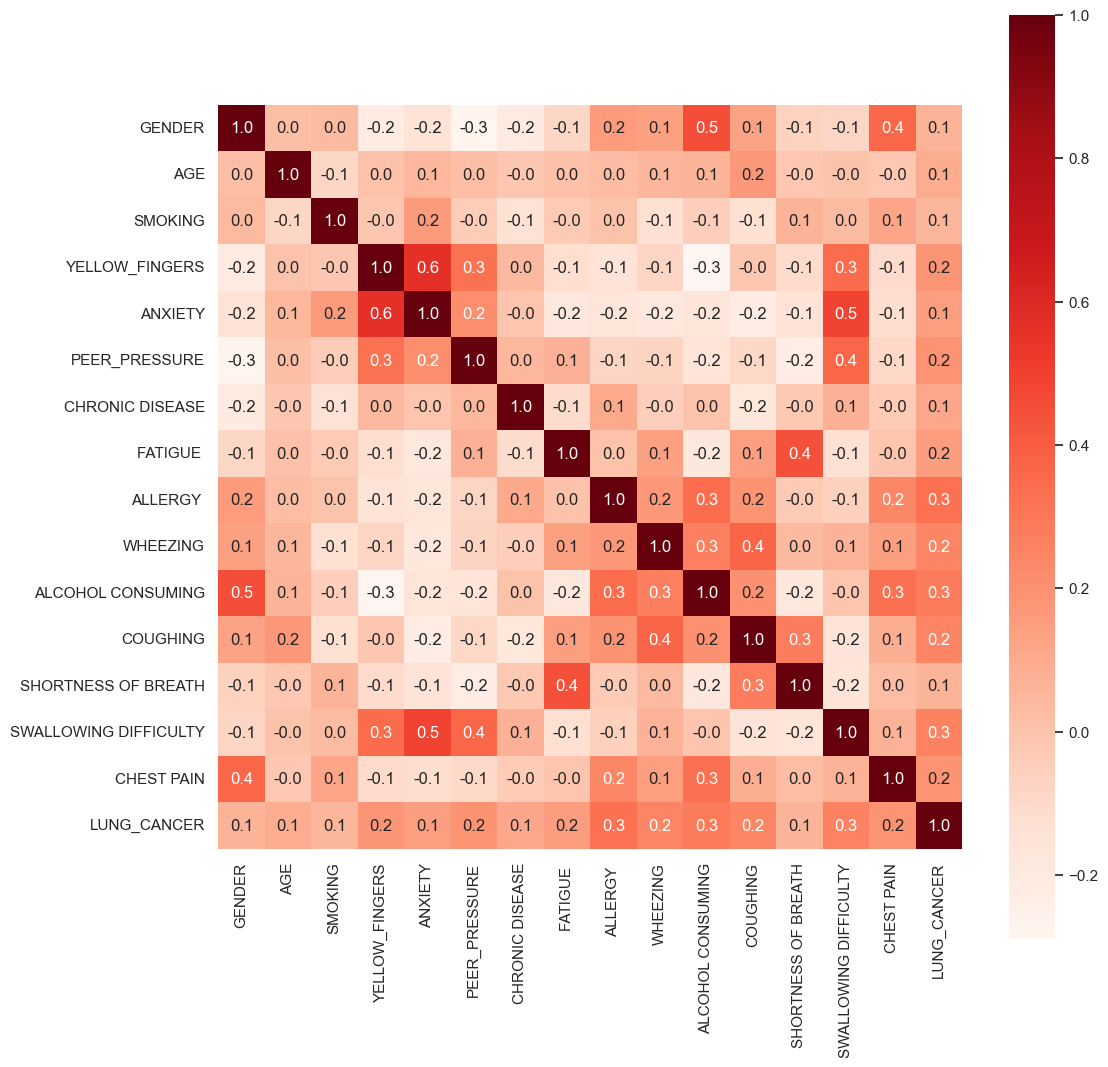

In [11]:
# We can use a heatmap to check correlation between the variables.

corr = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')

# There aren't a lot of strong correlations among the different features except maybe some minor ones such as:
# Shortness of breath causes fatigue
# More anxiety leads to more difficulty in breathing

<AxesSubplot:xlabel='SMOKING', ylabel='count'>

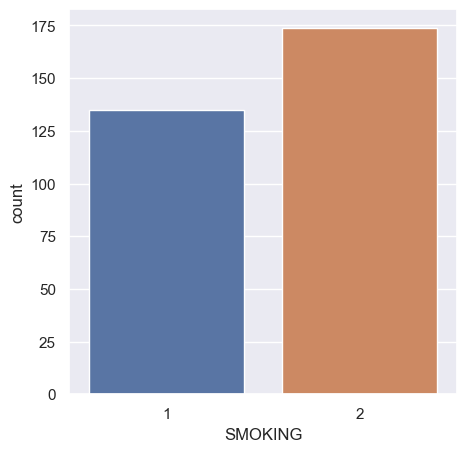

In [14]:
# Smokers count
plt.figure(figsize=(5,5))
sns.countplot(x="SMOKING", data=df)

# More smokers in the dataset compared to non smokers.

<AxesSubplot:ylabel='LUNG_CANCER'>

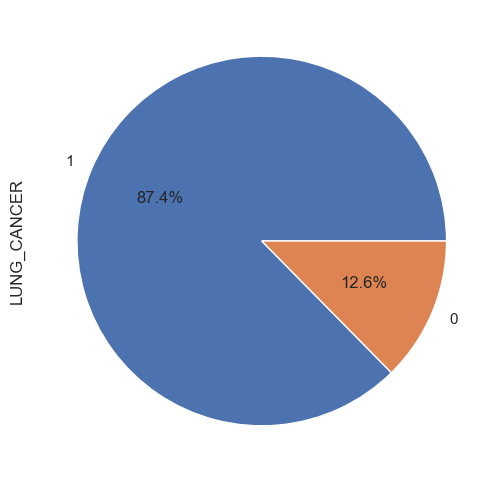

In [16]:
# Percentage of people with lung cancer in the dataset

# 100. * cancer_data.LUNG_CANCER.value_counts() / len(cancer_data.LUNG_CANCER)
df.LUNG_CANCER.value_counts().plot(kind='pie',figsize=(6, 6),autopct='%1.1f%%')

In [18]:
100. * df.LUNG_CANCER.value_counts() / len(df.LUNG_CANCER)

1    87.378641
0    12.621359
Name: LUNG_CANCER, dtype: float64

# More than 87% of the surveyors were diagnosed with lung cancer. Only the other ~ 13% were not.

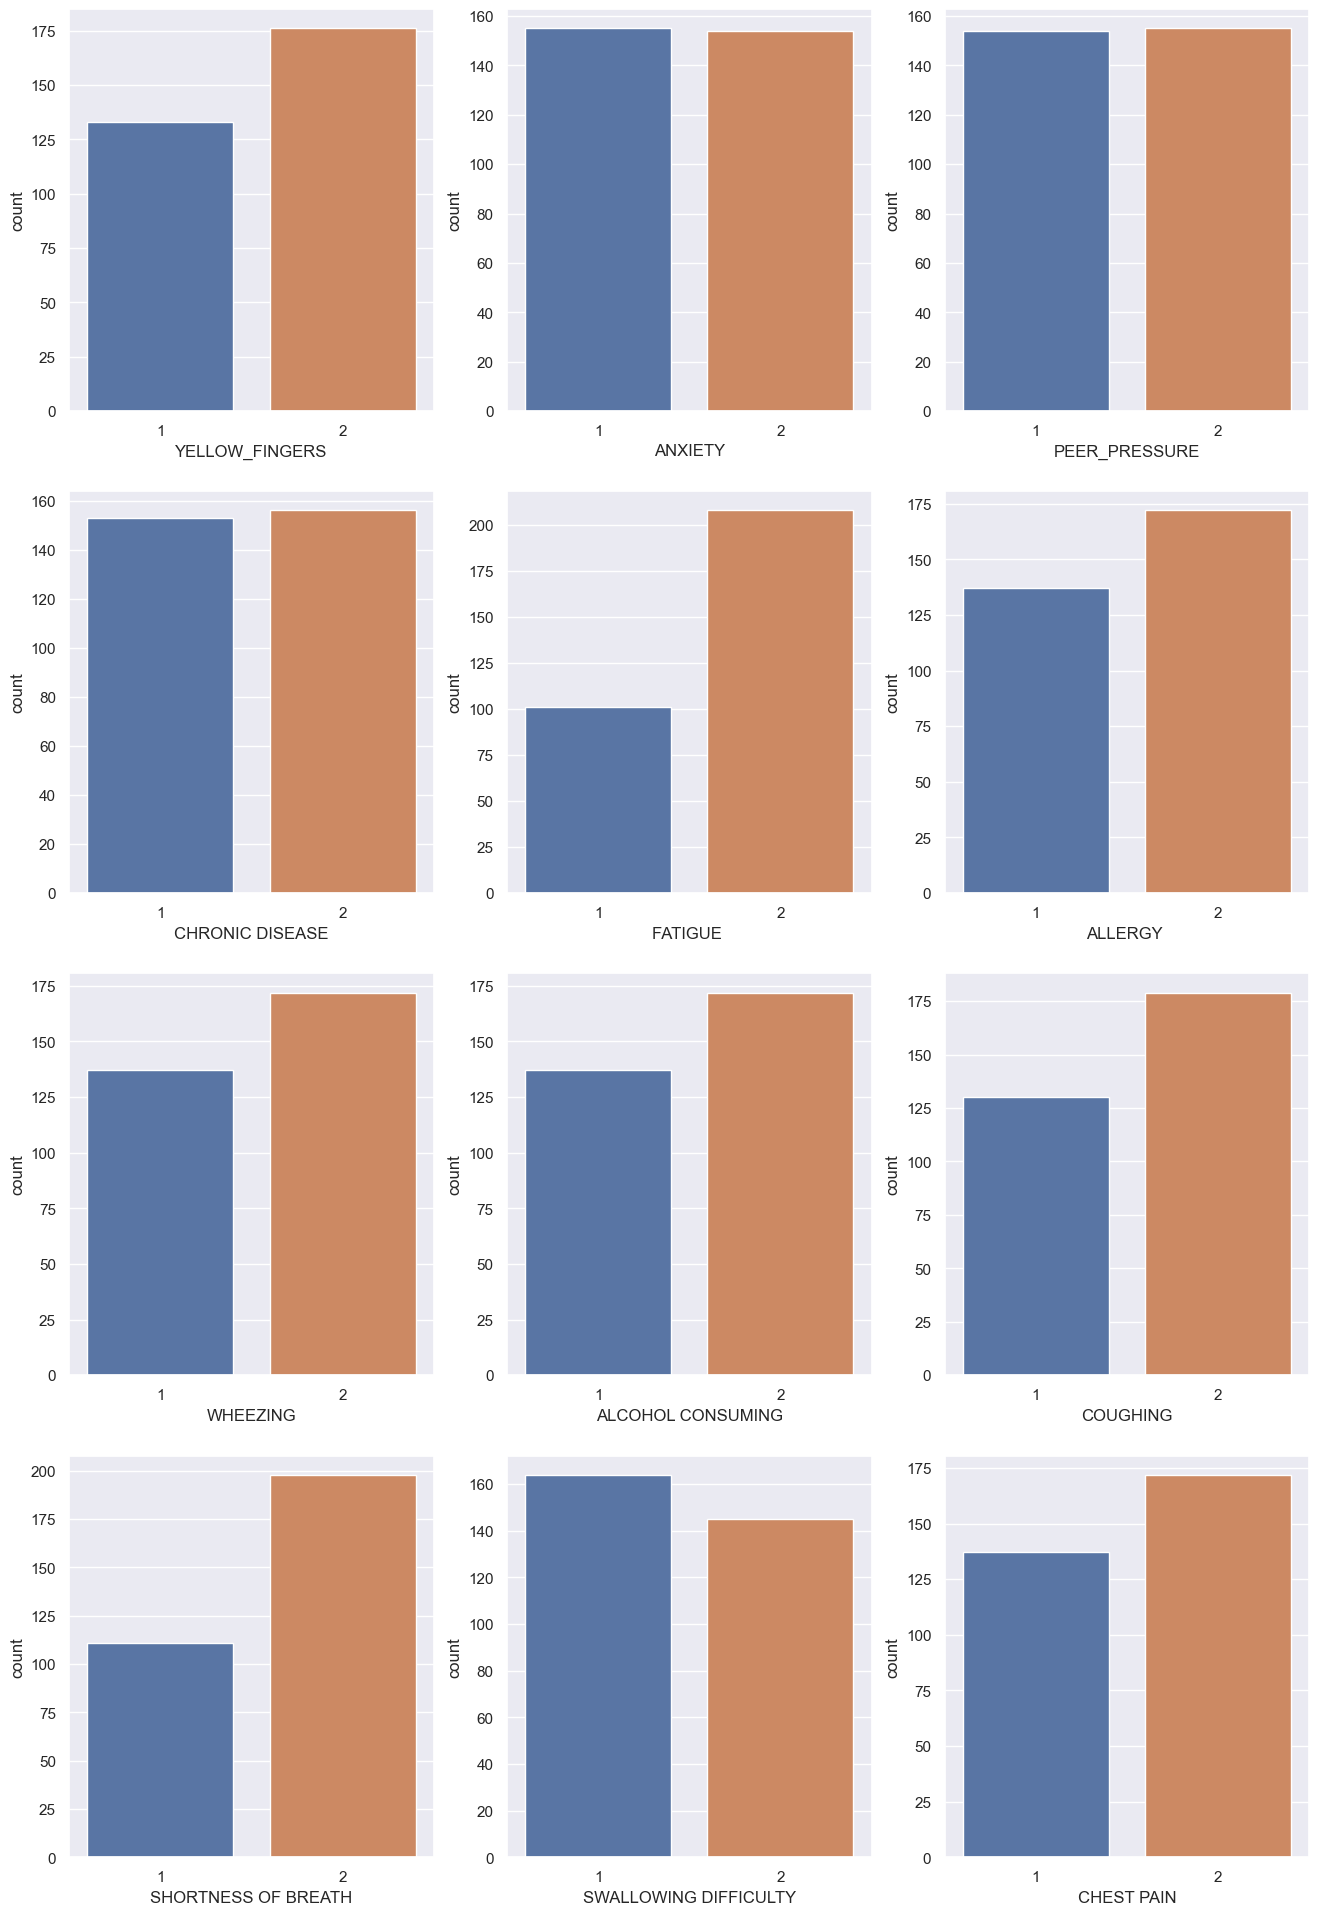

In [19]:
X = ['YELLOW_FINGERS', 'ANXIETY','PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING','ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',  'SWALLOWING DIFFICULTY', 'CHEST PAIN']
fig, ax = plt.subplots(nrows = 4, ncols = 3) # 16 subplots
fig.set_size_inches(16,24) # set figure size

for i in range(4):
    for j in range(3):
        sns.countplot(x = df[X[3 * i + j]] , ax = ax[i][j]) # count plot

# After plotting multiple countplots for the different features, we can see that most surveyors said yes to having symptoms such as yellow fingers, coughing, fatigue, shortness of breath and chest pain meaning these are the primary/more crucial symptoms that people should look out for as they may be at risk of having cancer.